In [2]:
import warnings 
warnings.filterwarnings('ignore')


In [3]:
import numpy  as np
import pandas as pd


In [4]:
advertising=pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
advertising.shape

(200, 4)

In [7]:
help(warnings)

Help on module warnings:

NAME
    warnings - Python part of the warnings subsystem.

MODULE REFERENCE
    https://docs.python.org/3.9/library/warnings
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

CLASSES
    builtins.object
        catch_warnings
    
    class catch_warnings(builtins.object)
     |  catch_warnings(*, record=False, module=None)
     |  
     |  A context manager that copies and restores the warnings filter upon
     |  exiting the context.
     |  
     |  The 'record' argument specifies whether warnings should be captured by a
     |  custom implementation of warnings.showwarning() and be appended to a list
     |  returned by the context manager. Otherwise None is returned by the context
  

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


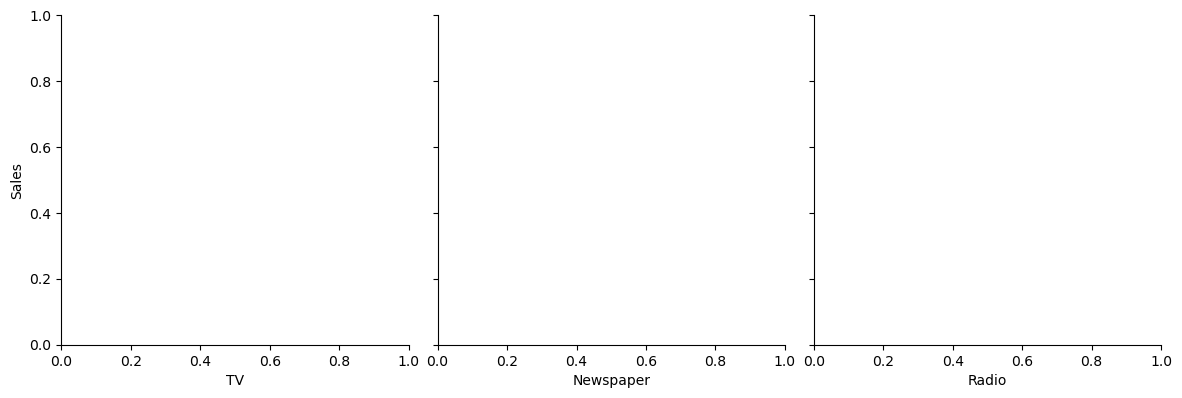

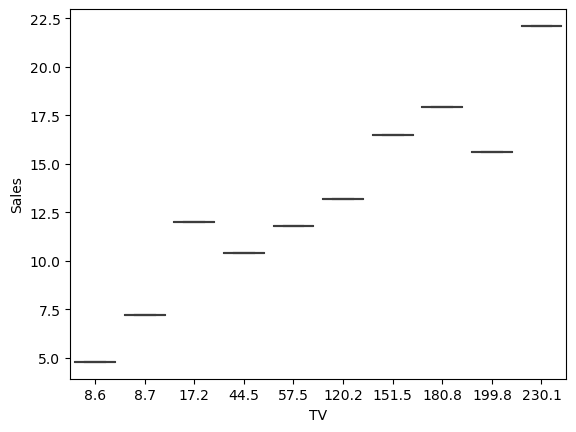

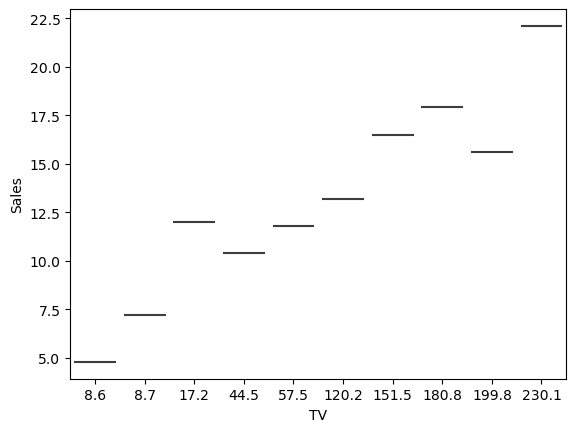

In [9]:
sns.pairplot(advertising,x_vars=['TV','Newspaper','Radio'],y_vars=['Sales'],aspect=1,kind='line',size=4)
plt.show()
#size decides the height of the figure where the aspect parameters descides the width and height ratio
# the more value of aspect the wider it gets
sns.boxplot(x='TV',y="Sales",data=advertising.head(10))
plt.show()
sns.violinplot(x='TV',y='Sales',data=advertising.head(10))
plt.show()

as id visible form the pariplot and the heatmap the variable tv seems to be the mos correlated with sales so lets go ahead and perfrom si9mple linear regression using tv as our feature varibal

In [9]:
x=advertising['TV']
y=advertising['Sales']
hey=pd.DataFrame({"Feature":x,"DV":y})
hey.index+=1
# indexing is the name and key for the first numbering system
hey

,Feature,DV
1,230.1,22.1
2,44.5,10.4
3,17.2,12.0
4,151.5,16.5
5,180.8,17.9
...,...,...
196,38.2,7.6
197,94.2,14.0
198,177.0,14.8
199,283.6,25.5


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

## About random_state
The random_state parameter in the train_test_split function is used to set a seed for the random number generator. This ensures that the split of data into training and testing sets is reproducible. When you use the same random_state value (in your case, 100), you’ll get the same split every time you run the code. This is particularly useful for debugging or if you want to demonstrate the results to someone else and need to ensure consistency in the data split.

Here’s a simple way to understand it:

Without random_state: Every time you run train_test_split, it could result in a different split because the selection is random each time.
With random_state set to an integer (like 100): The split will be the same every time you run train_test_split with that same seed123.
It’s like playing a video game with a save point. If you don’t save your game (no random_state), you start from different points every time. But if you save your game at a specific point (random_state=100), you start from that same point every time you play. This “save point” in machine learning helps in comparing models fairly, as they are trained and tested on the exact same data split.

Learn more
1

stackoverflow.com
2

stac

In [11]:
X_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [12]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
import statsmodels.api as sm
# add constant to add the intercept for the graph which was usually starts from the orginn originally
x_train_sm=sm.add_constant(X_train)
# fit the regression line using ols
lr=sm.OLS(y_train,x_train_sm).fit()

In [14]:
lr.params
#This will provide the value of the best fit. ‘const’ represents the intercept, indicating where to start on the y-axis, and by
#multiplying each value of ‘X_train’ by the coefficient, it will specify the location of each point.
#These points will then be connected to form the red line.

const    6.948683
TV       0.054546
dtype: float64

## Value of TV indicates 
the coefficient value of 0.054546 for the 'TV' variable in a linear regression model indicates the average change in the dependent variable for each one-unit change in 'TV', given that all other variables in the model are held constant. However, this is an average effect across all observations in your data.

In practice, individual predictions may vary around this average change due to other factors not included in the model, measurement error, or inherent variability in the data. The actual change for a specific case may be different from the average change indicated by the coefficient. This is where the residuals or errors come into play, which represent the differences between the observed values and the values predicted by the model for each observation.
## Value of const
it indicates that from whcih value the line will begin or at x=0 where the y point will lie

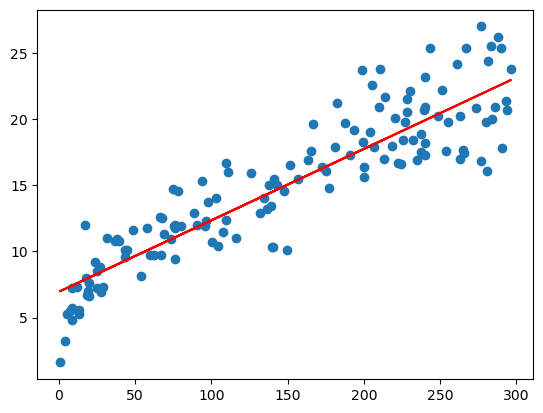

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [16]:
y_train_pred=lr.predict(x_train_sm)
res=(y_train-y_train_pred)

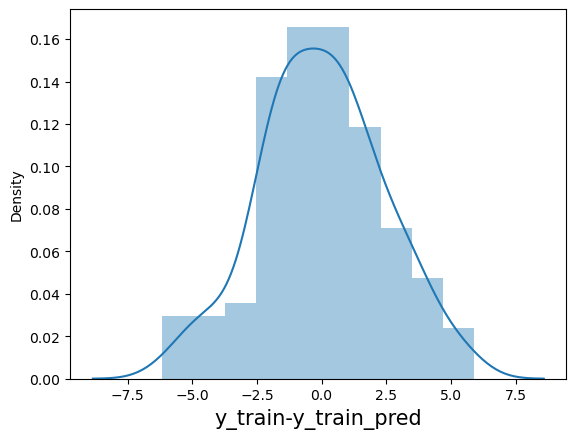

Text(0.5, 0.98, 'Error Terms')

In [17]:
sns.distplot(res,bins=10)
#distplot is given to represent the distribution of the given data
#bins decides the no. data needed to be showed
plt.xlabel("y_train-y_train_pred",fontsize=15)
plt.show()
# for adding the the label use 
fig=plt.figure()
fig.suptitle("Error Terms",fontsize=10)
#this shows that the residual error are in form of normal distribution

## To calculate the mean_squared_error and r2_squaure

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred=lr.predict(x_train_sm)
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           1.52e-52
Time:                        16:13:05   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
value1=np.sqrt(mean_squared_error(y_train,y_pred))
print(value1)

2.3984162246129914


In [20]:
value2=r2_score(y_train,y_pred)
he=pd.DataFrame({"RMSE":[value1],"R2_SCORE":[value2]})
he.index+=1

<Figure size 640x480 with 0 Axes>

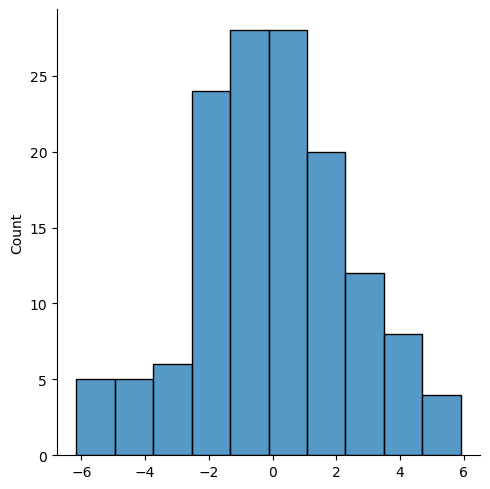

In [21]:
import seaborn as sns
x_test_sm= sm.add_constant(X_test)
y_test_pred=lr.predict(x_test_sm)
res1=y_test-y_test_pred
sns.displot(res,bins=10)
plt.show()

In [22]:
plt.scatter(X_test.head,y_test,c="y")
plt.plot(X_test,y_test_pred,"m")
plt.show()
# the differnece between the r squared value from the train and test set if the difference between them is under 5 that considered to be best as ti main tains the error

ValueError: x and y must be the same size

In [ ]:
help(plt.scatter)

In [ ]:
plt.scatter(y_test,y_test_pred,c="r")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_train=r2_score(y_train,y_train_pred)
r2_test=r2_score(y_test,y_test_pred)
RMSE_train=mean_squared_error(y_train,y_train_pred)
RMSE_test=mean_squared_error(y_test,y_test_pred)
index_values = ['Index1', 'Index2', 'Index3', 'Index4'] 
hey=pd.DataFrame({"r2_train":r2_train,"r2_test":r2_test,"RMSE_train":RMSE_train,"RMSE_test":RMSE_test},index=index_values)
print(hey)

In [ ]:
help(mean_squared_error)

## Learn building linearRegresssion using sklearn 

In [63]:
from sklearn.linear_model import LinearRegression
#splittiong datasets for training and testing the model
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
#steps in sklearn model building
# 1 create an object of linear regressiong
#fit the model
# see the params and then make the predictions(train,test)
#4 evaluate the 
lr= LinearRegression()
X_train.shape
# as the X_train 140, shape we have to  reshape it to 140,1 as its only one feature because of that we are unable to fit the model
X_train=X_train.values.reshape(-1,1)# why did we put -1 ?
# becuase ther we have to put the number of rows persent the data so trick to do it is -1 which will minus 
X_test= X_test.values.reshape(-1,1)
lr.fit(X_train,y_train)
# these will get us the value of coeficient and intercept
# print(lr.coef_)
# print(lr.intercept_)
y_predicted_values=lr.predict(X_test)
r2score_train=r2_score(y_test,y_predicted_values)
print(r2score_train)


0.792103160124566


In [ ]:
help(lr)

## Mulitiple linear regression

In [ ]:
advertising.head()

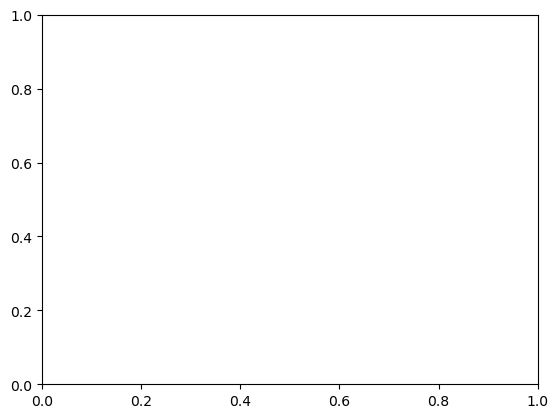

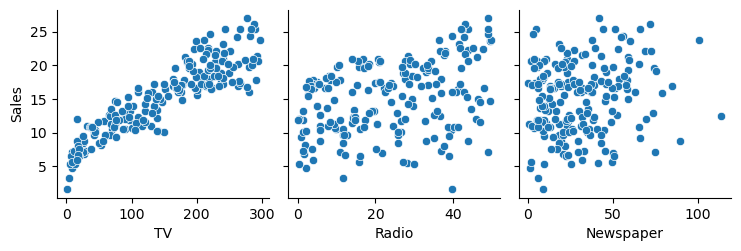

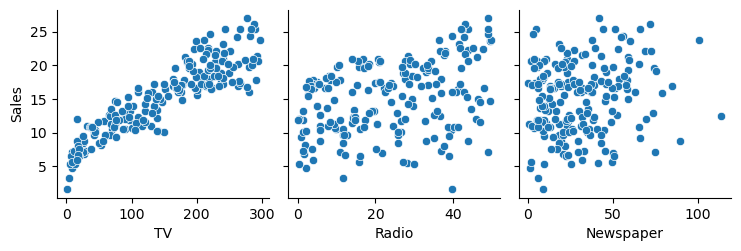

In [24]:
sns.pairplot(advertising,x_vars=["TV","Radio","Newspaper"],y_vars="Sales")
plt.show()

In [65]:
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming 'advertising' is your DataFrame containing the data

X = advertising[["TV", "Newspaper","Radio"]]
y = advertising["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

lm = LinearRegression()

# You should reshape X_train, not y_train
X_train = X_train.values.reshape(-1, 3)

# Fit the model with X_train and y_train
lm.fit(X_train, y_train)

print(f"this is the value of coefficient {lm.coef_} and \nThis is the value of intercept {lm.intercept_}")


this is the value of coefficient [0.05382911 0.00628995 0.11001224] and 
This is the value of intercept 4.334595861728433


In [66]:
from sklearn.metrics import r2_score
y_train_predict=lm.predict(X_train)
y_test_predict=lm.predict(X_test)
r2_score_train=r2_score(y_train,y_train_predict)
r2_score_test=r2_score(y_test,y_test_predict)
print(r2_score_train)
print(r2_score_test)

0.91049938193816
0.8655979373420271
